<a href="https://colab.research.google.com/github/heeyarun04/proyek-analisis-data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hiyarunnisa Kahes Waypi
- **Email:** yarun.kawa@gmail.com
- **ID Dicoding:** 1RXY1DWD3PVM

## Menentukan Pertanyaan Bisnis

- Bagaimana konsentrasi CO di Shunyi selama itu?
- Bagaimana perubahan pola konsentrasi CO dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [109]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [110]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


terdapat banyak perbedaan pada jumlah data pada kolom pm2.5, pm10, so2, no2, co, o3,temp, pres, dewp, rain, wd, wspm. Hal ini menunjukkan adanya missing values pada kolom tersebut. Hal ini akan kita tangani pada tahap data cleaning nanti.

In [111]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

dalam kode diatas, kolom CO adalah yang paling banyak terdapat missing value.

lalu cek juga apakah terdapat duplikasi

In [112]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


ketika menjalankan kode diatas, tidak ditemukan duplikasi

In [113]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

Menangani missing values:

Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [114]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [115]:
shunyi_df[shunyi_df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.0,12.0,3.0000,5.0000,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
99,100,2013,3,5,3,98.0,116.0,5.0000,4.0000,NaN,84.0,0.5,1016.7,-8.2,0.0,NNE,0.2,Shunyi
120,121,2013,3,6,0,200.0,208.0,79.6824,97.7228,NaN,61.0,4.5,1011.1,-5.0,0.0,NNW,0.7,Shunyi
131,132,2013,3,6,11,164.0,174.0,87.1080,75.7557,NaN,61.0,9.1,1010.5,-5.6,0.0,N,2.1,Shunyi
178,179,2013,3,8,10,174.0,196.0,74.2560,62.6165,NaN,98.0,16.8,1003.4,-1.4,0.0,SE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan **metode imputation** untuk menangani missing value.

Pada metode imputation, kita akan **menggunakan nilai tertentu untuk mengganti missing value**.

In [116]:
shunyi_df['TEMP'].value_counts()

 3.000    227
-2.000    213
 1.000    203
 0.000    199
-1.000    195
         ... 
 4.675      1
 4.260      1
 2.550      1
 1.725      1
-0.650      1
Name: TEMP, Length: 985, dtype: int64

In [117]:
shunyi_df['CO'].value_counts()

300.0     2881
400.0     2563
200.0     2282
500.0     2239
600.0     2135
          ... 
9800.0       1
4299.0       1
4799.0       1
4599.0       1
8200.0       1
Name: CO, Length: 115, dtype: int64

In [118]:
shunyi_df['O3'].value_counts()

2.0000      3478
4.0000       774
3.0000       714
5.0000       611
6.0000       550
            ... 
13.4946        1
50.1228        1
16.9218        1
80.9676        1
311.0000       1
Name: O3, Length: 961, dtype: int64

Dari kode diatas, dapat diketahui bahwa nilai yang paling dominan dalam kolom TEMP, CO, O3 secara berturut-turut ialah "3.0", “300.0", "2.0" Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

In [119]:
shunyi_df[['CO', 'O3', 'TEMP']] = shunyi_df[['CO', 'O3', 'TEMP']].apply(lambda x: x.fillna({'CO': 300, 'O3': 2.0, 'TEMP': 3}))

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [120]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [121]:
shunyi_df[shunyi_df.year == shunyi_df.year.min()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,7340,2013,12,31,19,23.0,111.0,18.0,57.0,400.0,17.0,7.1,1010.4,-17.1,0.0,NW,1.7,Shunyi
7340,7341,2013,12,31,20,23.0,111.0,18.0,57.0,300.0,30.0,3.7,1010.7,-16.1,0.0,WNW,0.9,Shunyi
7341,7342,2013,12,31,21,19.0,69.0,11.0,47.0,400.0,27.0,0.5,1010.8,-14.3,0.0,W,1.5,Shunyi
7342,7343,2013,12,31,22,31.0,71.0,19.0,70.0,700.0,4.0,5.8,1010.9,-15.5,0.0,W,3.0,Shunyi


In [122]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


## Exploratory Data Analysis (EDA)

### Explore Data shunyi_df

In [123]:
shunyi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,34581,35020.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4540,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,NaN,1.807533,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,NaN,1.287817,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah data polusi sebanyak 35064 yang mempunyai rentang tahun 2013 -2017 dengan rata-rata diambil pada tahun 2014 dengan standar deviasinya sebesar 1.17

In [ ]:
mean_co_per_month = shunyi_df.groupby('month')['CO'].mean()

# Menampilkan hasil
print(mean_co_per_month)

In [151]:
mean_co_per_year = shunyi_df.groupby('year')['CO'].mean()
print(mean_co_per_year)

year
2013    1238.582958
2014    1166.183404
2015    1180.265183
2016    1081.358572
2017    1760.878963
Name: CO, dtype: float64


In [155]:
mean_co_per_month_per_year = shunyi_df.groupby(['year', 'month'])['CO'].mean().reset_index()

print(mean_co_per_month_per_year)

    year  month           CO
0   2013      3  1397.540146
1   2013      4  1029.651603
2   2013      5  1014.553867
3   2013      6  1378.332824
4   2013      7   911.557971
5   2013      8  1013.648294
6   2013      9  1219.705036
7   2013     10  1132.962448
8   2013     11  1223.988439
9   2013     12  1776.379066
10  2014      1  1652.060440
11  2014      2  1930.191693
12  2014      3  1229.594595
13  2014      4   902.832861
14  2014      5   880.906593
15  2014      6   705.747126
16  2014      7   959.109875
17  2014      8   802.213001
18  2014      9   949.135447
19  2014     10  1236.049724
20  2014     11  1461.461318
21  2014     12  1367.236467
22  2015      1  1740.529248
23  2015      2  1303.201220
24  2015      3  1109.217877
25  2015      4   737.787356
26  2015      5   655.401662
27  2015      6  1122.701149
28  2015      7   781.643836
29  2015      8   750.209790
30  2015      9   695.976155
31  2015     10   880.952381
32  2015     11  1793.449782
33  2015     1

In [142]:
descriptive_stats = shunyi_df[['CO', 'O3', 'PM10', 'TEMP', 'wd', 'WSPM']].describe()

print(descriptive_stats)

                 CO            O3          PM10          TEMP          WSPM
count  32886.000000  33575.000000  34516.000000  35013.000000  35020.000000
mean    1187.063979     55.201321     98.737026     13.387969      1.807533
std     1156.374102     54.873726     89.143718     11.483588      1.287817
min      100.000000      0.214200      2.000000    -16.800000      0.000000
25%      400.000000     10.000000     31.000000      3.000000      1.000000
50%      800.000000     43.000000     77.000000     14.400000      1.500000
75%     1500.000000     77.000000    138.000000     23.200000      2.300000
max    10000.000000    351.716400    999.000000     40.600000     12.800000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

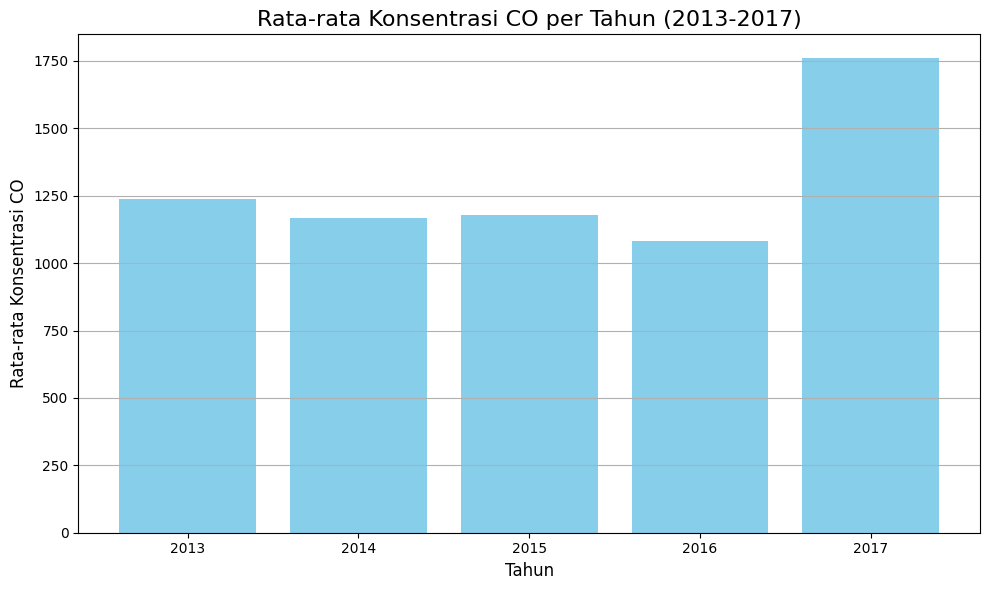

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(mean_co_per_year.index, mean_co_per_year.values, color='skyblue')

plt.title('Rata-rata Konsentrasi CO per Tahun (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi CO', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

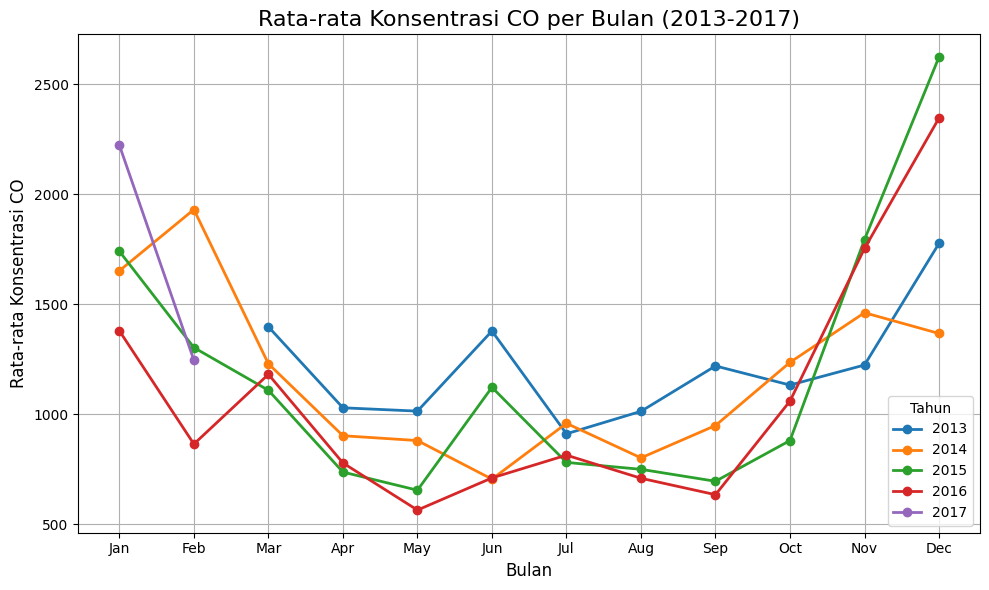

In [140]:
plt.figure(figsize=(10, 6))
for year in range(2013, 2018):
    yearly_data = mean_co_per_month_per_year[mean_co_per_month_per_year['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['CO'], marker='o', linewidth=2, label=str(year))

plt.title('Rata-rata Konsentrasi CO per Bulan (2013-2017)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi CO', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Tahun', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Dari tahun 2013 hingga 2016, terjadi penurunan dalam rata-rata konsentrasi CO. Peningkatan yang signifikan dalam rata-rata konsentrasi CO pada tahun 2017 (1760.878963) memerlukan perhatian khusus. Ini bisa disebabkan oleh faktor-faktor seperti perubahan dalam aktivitas industri atau transportasi, cuaca ekstrem, atau kegagalan dalam penerapan kebijakan pengendalian emisi.
- Data ini menunjukkan fluktuasi yang signifikan dalam konsentrasi CO dari bulan ke bulan dan dari tahun ke tahun, dengan beberapa bulan menunjukkan konsentrasi CO yang jauh melebihi standar kesehatan yang ditetapkan. Ini menyoroti pentingnya pengawasan dan tindakan untuk mengendalikan polusi udara, terutama dalam bulan-bulan di mana konsentrasi CO cenderung tinggi.